<a href="https://colab.research.google.com/github/kumar1607/Deep-CNN-Autoencoder---Denoising-Image/blob/main/Deep_CNN_Autoencoder_Denoising_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

In the context of deep CNN autoencoders for image compression:

#Max Pooling (Encoder):

Shrinks image size: Reduces image dimensions while keeping the most prominent features (like edges). This compresses the data for efficient storage/transmission.

#Up Sampling (Decoder):

Expands image size: Increases the dimensions back to the original size. However, due to compression, some information loss might occur. The decoder tries to reconstruct the image using the compressed representation.

#Flow of Autoencoder

Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

#Import Modules

In [1]:

import numpy as np  # Imports the NumPy library for numerical computations and array manipulation

import matplotlib.pyplot as plt  # Imports the matplotlib.pyplot library for creating visualizations

from keras import Sequential  # Imports the Sequential class from Keras for building neural network architectures

from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D  # Imports specific layer types from Keras for building CNNs

from keras.datasets import mnist  # Imports the MNIST dataset (handwritten digits) from Keras datasets


#Loading the Dataset

In [2]:

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:

# normalizing the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshaping in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

#Adding Noise to the Image

In [6]:

# adding noise
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


# clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


This code injects noise into training and testing data (x_train and x_test) for image denoising. It adds Gaussian noise with a controllable intensity (noise_factor) and ensures pixel values stay within the valid 0-1 range for image data using clipping.

#Exploratory Data Analysis

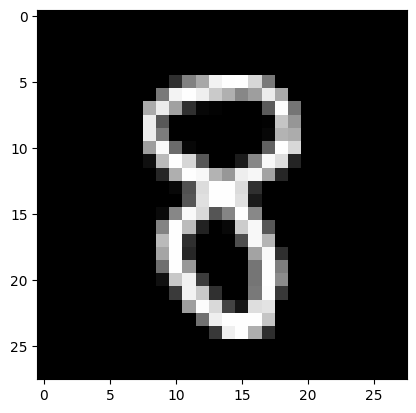

In [7]:

# randomly selecting input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

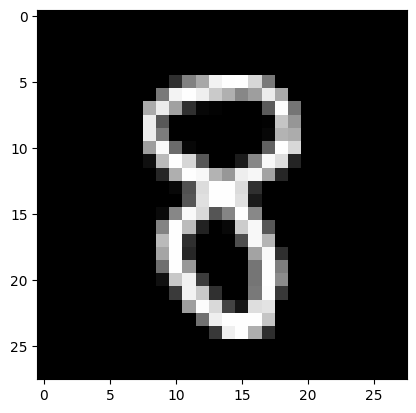

In [8]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

#Model Creation

In [9]:

model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)        0

**MaxPooling2D:** Downsamples images by taking the maximum value within local regions.

**UpSampling2D:**  Upsamples images to increase spatial dimensions, commonly used in decoders.

**activation='relu':** Rectified Linear Unit (ReLU) activation function, a common choice for introducing non-linearity.

**Adam** = Adaptive Moment Estimation.
It combines the benefits of other optimizers like AdaGrad and RMSProp to adjust learning rates for each parameter based on historical gradients. This can lead to faster convergence and better performance compared to simpler optimizers.

**Binary crossentropy** measures the difference between the predicted probabilities (how likely a pixel is white) and the actual values (0 for black, 1 for white) in the reconstructed image. The goal is to minimize this loss during training, pushing the model to generate outputs that closely resemble the original clean images.

In [10]:
# train the model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))


Epoch 1/20
235/235 [==============================] - 12s 13ms/step - loss: 0.2451 - val_loss: 0.1581
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1481 - val_loss: 0.1399
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1376 - val_loss: 0.1362
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1331 - val_loss: 0.1304
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1301 - val_loss: 0.1278
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1280 - val_loss: 0.1257
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.1259 - val_loss: 0.1235
Epoch 8/20
235/235 [==============================] - 4s 17ms/step - loss: 0.1243 - val_loss: 0.1221
Epoch 9/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1228 - val_loss: 0.1210
Epoch 10/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1216 - val_lo

# Visualize the Results

In [11]:
# predicting the results from model (get compressed images)
pred = model.predict(x_test_noisy)

313/313 [==============================] - 1s 3ms/step


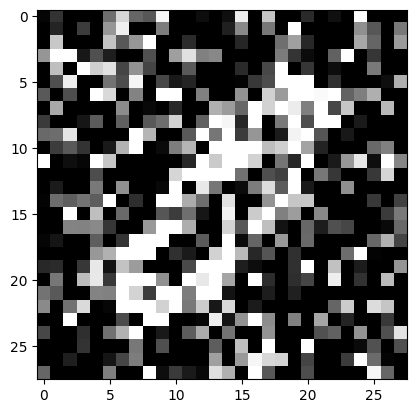

In [12]:

# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()


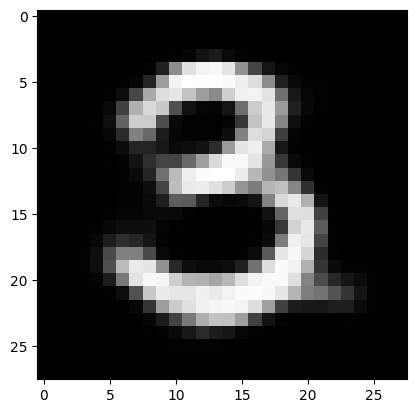

In [19]:

# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

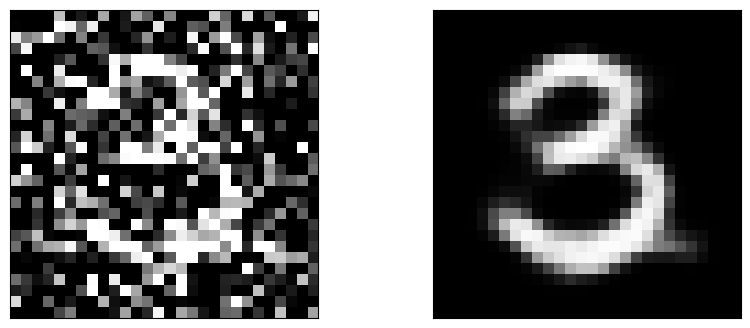

In [18]:

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray() #Sets the colormap to grayscale, appropriate for displaying the black and white MNIST digits.
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()